# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The goal is to examine a set of job postings with salaries and then predict salaries for a new set of job postings. 

Following details are given for the job postings,
1. Job Id
2. Company Id
3. Major
4. Degree
5. Job Type
6. Industry
8. Years of Experience
7. Salary

In [22]:
#importing libraries
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn import model_selection
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt  # Matlab-style plotting


#etc

#your info here
__author__ = "Kanchan Pandhare"
__email__ = "kanchan.pandhare08@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----
In this section we will load the data provided using Pandas. We will be loading 3 datasets,
1. train_features.csv this contains the training dataset
2. test_features.csv this data is used for testing purpose and it is similar to train_features.csv
3. train_salaries.csv this dataset contains the job Id and salary


In [23]:
#load the data into a Pandas dataframe
train_job_postings = pd.read_csv('data/train_features.csv')
test_job_postings = pd.read_csv('data/test_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')

print("Training Data")
display(train_job_postings)
print("Test Data")
display(test_job_postings)
print("Target Output")
display(train_salaries)

Training Data


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5


Test Data


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...,...
999995,JOB1362686407682,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,JOB1362686407683,COMP5,MANAGER,NONE,NONE,HEALTH,20,67
999997,JOB1362686407684,COMP61,JANITOR,NONE,NONE,OIL,1,91
999998,JOB1362686407685,COMP19,CTO,DOCTORAL,MATH,OIL,14,63


Target Output


,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
...,...,...
999995,JOB1362685407682,88
999996,JOB1362685407683,160
999997,JOB1362685407684,64
999998,JOB1362685407685,149


### ---- 3 Clean the data ----
After loading the dataset in pandas dataframe we will check,
1. If there are is any duplicate data
2. If data is blank in any of the fields

We will merge the training features with the output and analyse the data first. In the descriptive statistical analysis it is clear that we have 2 numerical fields and yearsOfExperience and milesFromMetropolis. The rest others are categorical fields in the dataset. 



In [24]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
train_job_postings.duplicated().sum()

#Since there are no duplicate values, let's now check for null values if any
missing_train = train_job_postings.isnull().sum()
missing_test = test_job_postings.isnull().sum()

def isDataMissing(DataToCheck):
#missing data
    total = DataToCheck.isnull().sum().sort_values(ascending=False)
    percent = (DataToCheck.isnull().sum()/DataToCheck.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    display(missing_data.head(20))

print("Check for Missing Data in Training Set")
isDataMissing(train_job_postings)
print("Check for Missing Data in Test Set")
isDataMissing(test_job_postings)

#get complete training data along with the target variable
train_data = pd.merge(train_job_postings, train_salaries, left_on="jobId", right_on = "jobId", how="left")
display(train_data)
print("-"*120)

#descriptive statistics summary
display(train_job_postings.describe(include = 'int64'))
print("-"*120)
display(train_job_postings.describe(include = 'O'))



    

Check for Missing Data in Training Set


,Total,Percent
milesFromMetropolis,0,0.0
yearsExperience,0,0.0
industry,0,0.0
major,0,0.0
degree,0,0.0
jobType,0,0.0
companyId,0,0.0
jobId,0,0.0


Check for Missing Data in Test Set


,Total,Percent
milesFromMetropolis,0,0.0
yearsExperience,0,0.0
industry,0,0.0
major,0,0.0
degree,0,0.0
jobType,0,0.0
companyId,0,0.0
jobId,0,0.0


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


------------------------------------------------------------------------------------------------------------------------


,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


------------------------------------------------------------------------------------------------------------------------


,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684856397,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206



## ---- 4 Explore the data (EDA) ----
### Analyse target variable Salary
Plot the histogram for the target variable i.e. Salary and check the distribution. The distribution seems normal.
### Analyse remaining features w.r.t Salary
Now we will analyse each feature and check for outliers if any.

Histogram plot of target variable (Salary):


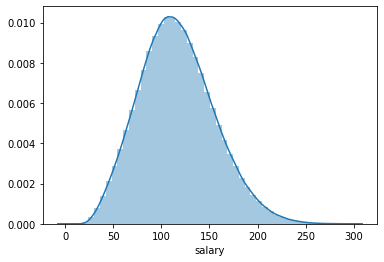

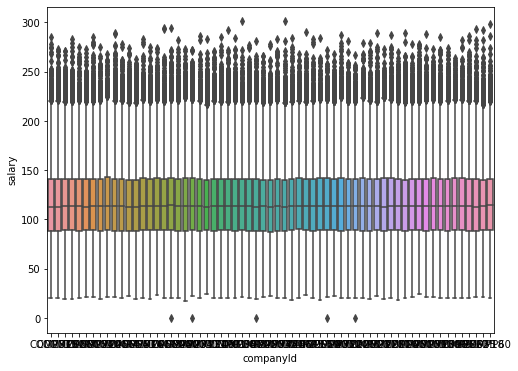

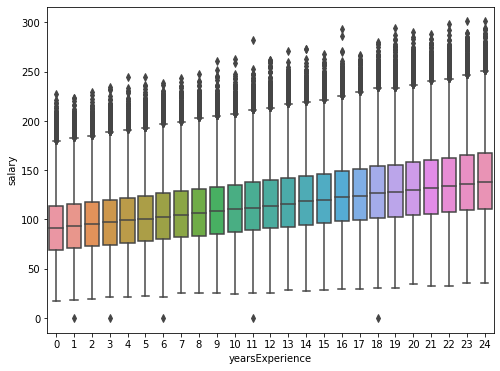

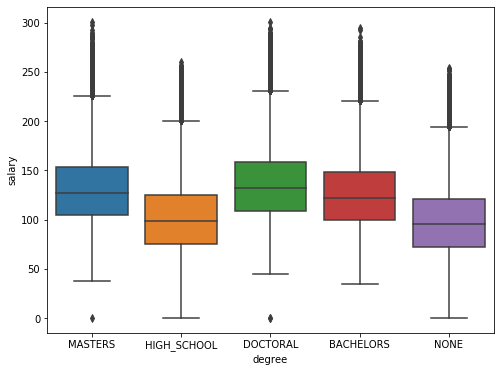

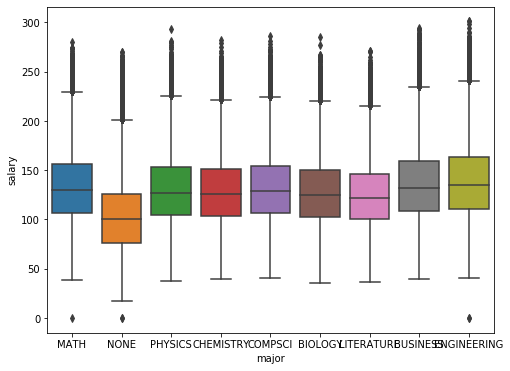

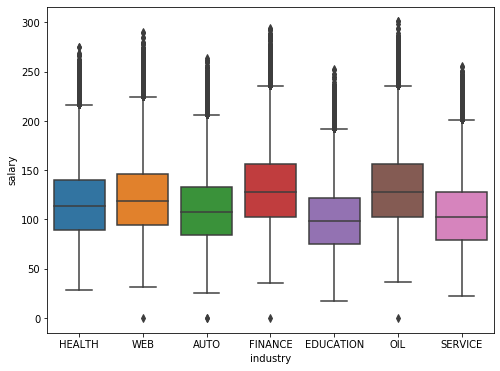

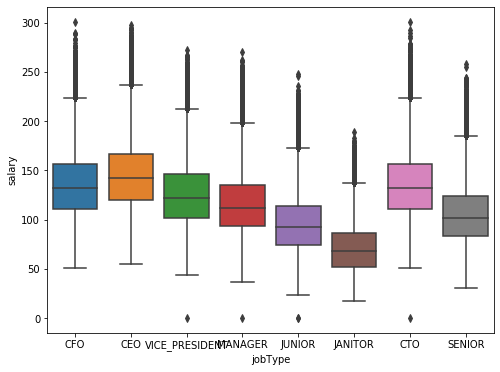

In [25]:

print("Histogram plot of target variable (Salary):")
sns.distplot(train_data['salary']);

#Analyse each feature
features = ['companyId','yearsExperience','degree','major','industry','jobType']
#box plot overallqual/salary
for feature in features:
    plot_data = pd.concat([train_data['salary'], train_data[feature]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=feature, y="salary", data=plot_data)




## Dependency on Job Id
Since the job id feature is not related to the target variable salary. So we will take the backup of Job Id so that it can be used later during predictions and exclude the "Job Id" from the training set


## Outliers Analysis
In the above box-plots output, the circles indicate the outliers, and there are many. Once we have identified the outliers, we need to treat them. Following technique is one of the methods of treating outliers

#### Quantile-based Flooring and Capping
In this technique, we will do the flooring (e.g., the 5th percentile) for the lower values and capping (e.g., the 95th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.





In [26]:
TrainJobId = train_job_postings['jobId']
TestJobId  = test_job_postings['jobId']

#Quantile-based Flooring and Capping
print("Lower Limit")
print(train_data['salary'].quantile(0.05))
print("Upper Limit")
print(train_data['salary'].quantile(0.95))

train_data = train_data[(train_data['salary']> 56 ) & (train_data['salary'] < 184)]
display(train_data)
print("-"*120)

Lower Limit
56.0
Upper Limit
184.0


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


------------------------------------------------------------------------------------------------------------------------



### ---- 5 Establish a baseline ----


From the above box plot it is clear that the categorical features such as major, degree, jobType and industry are also dependent on target variable salary. So in order to use this categorical features for training we will have to convert these features in numeric form. There are two ways to do this,
1. One Hot Encoded
2. Integer Encoded

We will represent each feature with one-hot encoding get_dummies function from pandas creating a separate column for each distinct value. For example consider degree field, on one-hot encoding it will create following fields
- degree_NONE
- degree_HIGHSCHOOL
- degree_BACHELORS
- degree_MASTERS
- degree_DOCTORAL

So for a record where degree is Bachelors the values in the above field will be as follows,
- degree_NONE        0
- degree_HIGHSCHOOL  0
- degree_BACHELORS   1
- degree_MASTERS     0
- degree_DOCTORAL    0

Similarly we will apply the same logic to other categorical features


We then create a co-relation map to check the dependency of each feature with the remaining features and target variable salary. From the co-relation map it is understandable that the features all the features except Job Id is important for salary prediction so we will just drop the Job Id and use the others for creating the training data-set. We create a function "convertCategoricalFeatures" to add all the above integer encoding and one-hot encoding, removing the unnecessary features for both training and test set. 

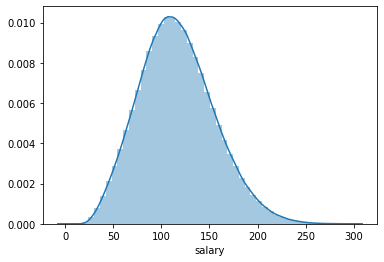

In [27]:

#Salary is the variable we need to predict. So let's do some analysis on this variable first.
sns.distplot(train_salaries['salary']);
#So the target variable is normally distributed

def convertCategoricalFeatures(data):
  #We will drop the jobId column as it is independent of salary
    data.drop(columns=['jobId'],inplace=True)
    #Convert categorical features to one hot encoded features  
    data = pd.get_dummies(data).reset_index(drop=True)
    return data





### ---- 6 Hypothesize solution ----
There are many machine learning algorithms, however they can be reduced to four categories: 
1. Classification
2. Regression
3. Clustering
4. Dimensionality reduction

Depending on your target variable and data modeling goals. We'll save clustering and dimension reduction for another day, and focus on classification and regression. We can generalize that a continuous target variable requires a regression algorithm and a discrete target variable requires a classification algorithm. One side note, logistic regression, while it has regression in the name, is really a classification algorithm. Since our problem is predicting the salary based on provided job details, this is a continuous target variable. We will use a regression algorithm from the sklearn library to begin our analysis. We will use cross validation and scoring metrics, to rank and compare our algorithms’ performance.

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

### ---- 7 Engineer features  ----
We call the function "convertCategoricalFeatures" to add all the above integer encoding and one-hot encoding, removing the unnecessary features for both training and test set.  I have plotted the box-plot's again to show how it is correctly handled using integer encoding and make sure all the descrepancy is removed.

Final Training Data Set


,yearsExperience,milesFromMetropolis,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896807,19,94,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
896808,12,35,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
896809,16,81,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
896810,6,5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Co-relation Map to see how features are co-related
Final Test Data Set


,yearsExperience,milesFromMetropolis,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,22,73,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,20,47,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,10,44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


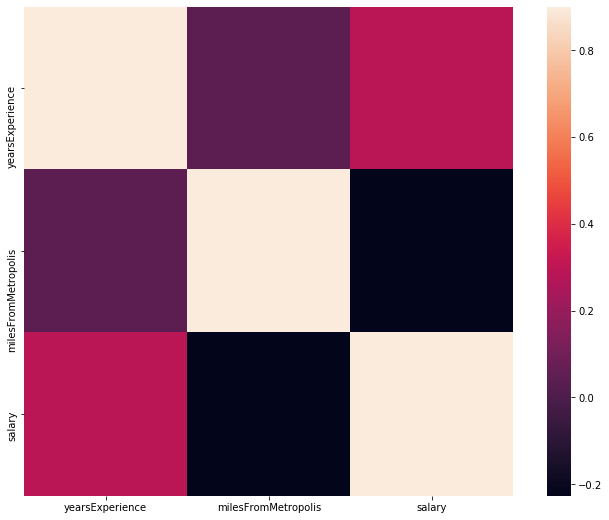

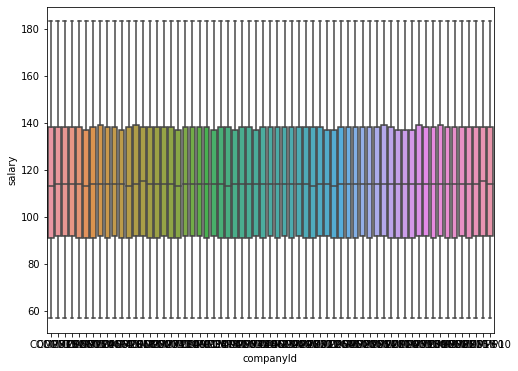

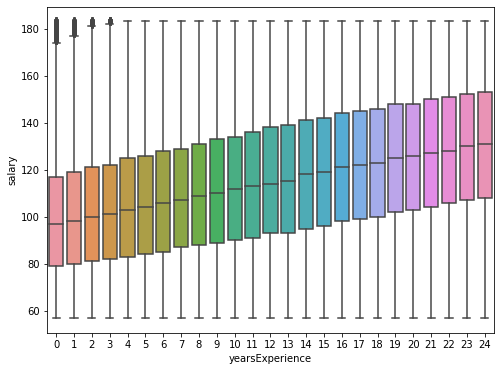

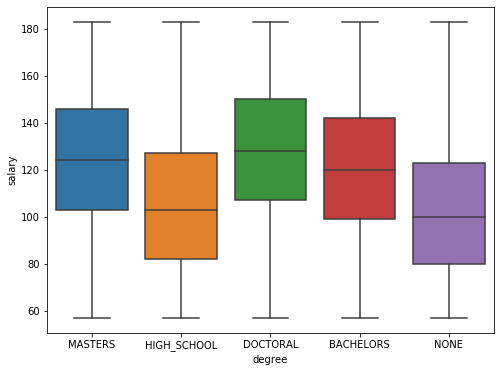

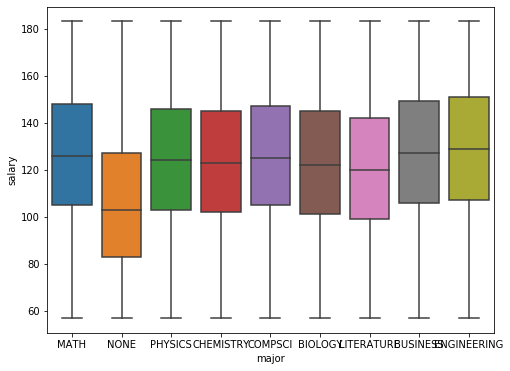

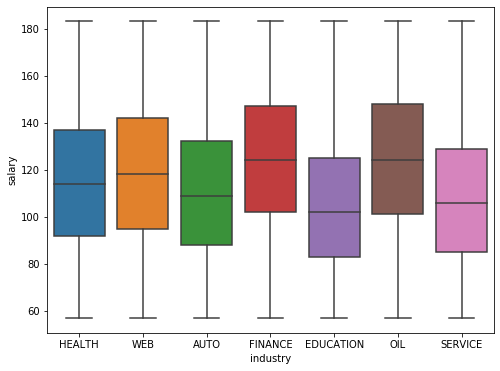

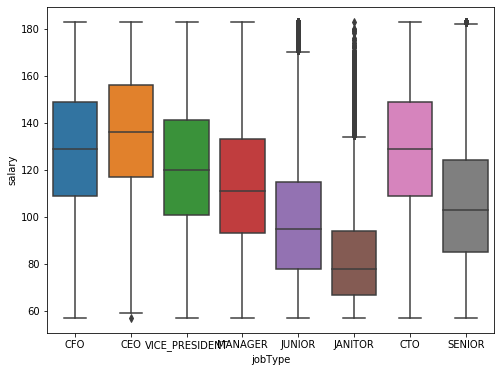

In [28]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model
train_x = convertCategoricalFeatures(train_data)
#train_x['milesFromMetropolis'] = 99- train_x['milesFromMetropolis']

train_y = train_x['salary']
#Removing target variable from the training set
train_x = train_x.drop(columns = ['salary'])
print("Final Training Data Set")
display(train_x)


#summarize each feature variable
#look for correlation between each feature and the target varsalary
print("Co-relation Map to see how features are co-related")
corrmat = train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


#Analyse each feature
features = ['companyId','yearsExperience','degree','major','industry','jobType']
#box plot overallqual/salary
for feature in features:
    plot_data = pd.concat([train_data['salary'], train_data[feature]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=feature, y="salary", data=plot_data)


test_x = convertCategoricalFeatures(test_job_postings)
print("Final Test Data Set")
display(test_x.head())

### ---- 8 Create models ----
In this section we will be creating the models and testing them to find the optimum model suitable for the prediction. We will be using the MSE(Mean Square Error) Metrics for determining the best suitable model. 

We have implemented the below models,
1. Linear Regression
2. Lasso
3. RandomForestRegressor
4. KNeighborsRegressor

In [29]:
#create and tune the models that you brainstormed during part 2
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


cv_split = model_selection.ShuffleSplit(n_splits = 2, test_size = .3, train_size = .6, random_state = 0 ) 
# run model 10x with 60/30 split intentionally leaving out 10%
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
        LinearRegression(normalize=True, n_jobs=-1),
        RandomForestRegressor(max_depth=5),
        Lasso(),
        KNeighborsRegressor()
    ]
MLA_columns = ['MLA','MLA Name', 'MLA Parameters','Mean Square Error','Fit Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = train_y

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    print("Running...")
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA'] = alg
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate (alg, train_x, train_y, cv  = cv_split, scoring=['neg_mean_squared_error'])
    print(cv_results)
    MLA_compare.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Mean Square Error'] = (-1) * cv_results['test_neg_mean_squared_error'].mean()
    row_index+=1
    

Running...
{'fit_time': array([3.80129218, 3.7806499 ]), 'score_time': array([0.47471714, 0.49471164]), 'test_neg_mean_squared_error': array([-327.65976274, -328.02395175])}
Running...
{'fit_time': array([317.19382763, 317.24631953]), 'score_time': array([2.96605039, 2.93401718]), 'test_neg_mean_squared_error': array([-546.97393612, -546.04897708])}
Running...
{'fit_time': array([3.48504877, 3.48497415]), 'score_time': array([0.50773168, 0.49627233]), 'test_neg_mean_squared_error': array([-444.30462808, -444.37428985])}
Running...
{'fit_time': array([65.51091361, 66.24253464]), 'score_time': array([505.10189748, 507.44331074]), 'test_neg_mean_squared_error': array([-422.17651314, -421.35716359])}


### ---- 9 Test models ----
We will now test the models to determine the best suitable model. The below code prints the table of model with the corresponding MSE score sorted from lowest MSE to highest. Along with the fit time taken by each model

In [30]:
#do 5-fold cross validation on models and measure MSE
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['Mean Square Error'], ascending = True, inplace = True)
display(MLA_compare)
#MLA_predict

,MLA,MLA Name,MLA Parameters,Mean Square Error,Fit Time
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",327.842,3.79097
3,"KNeighborsRegressor(algorithm='auto', leaf_siz...",KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",421.767,65.8767
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",444.339,3.48501
1,"RandomForestRegressor(bootstrap=True, ccp_alph...",RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",546.511,317.22


### ---- 10 Select best model  ----
From the above output it is clear that Lasso Model gives us the least error with optimum fit time. So we will choose this model and fit the data for predictions on test data set

In [31]:
#select the model with the lowest error as your "prodcuction" model
algorithm =Lasso()
algorithm.fit(train_x,train_y)
test_predict = algorithm.predict(test_x)
print("Test Set Predictions:")
print(test_predict)

Test Set Predictions:
[119.62928042 109.48222253 148.46768351 ...  61.41826635 133.80522325
 112.94326377]


## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----
We will associate the predictions against the Job Ids of testing data set and see the result

In [32]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset
predictions = pd.DataFrame({"predictions":test_predict})
test_results = pd.concat([TestJobId, predictions], axis=1)
display(test_results)

,jobId,predictions
0,JOB1362685407687,119.629280
1,JOB1362685407688,109.482223
2,JOB1362685407689,148.467684
3,JOB1362685407690,105.126776
4,JOB1362685407691,114.850484
...,...,...
999995,JOB1362686407682,145.639318
999996,JOB1362686407683,117.266222
999997,JOB1362686407684,61.418266
999998,JOB1362686407685,133.805223


### ---- 12 Deploy solution ----
Saving the result in test_salaries.csv file

In [33]:
#saving the predictions to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders
test_results.to_csv("data/test_salaries.csv", index = False)